<a href="https://colab.research.google.com/github/quezadasubiabre/tarea0/blob/master/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 4: Modelo de clasificación predictivo de credict scoring.





## Imports

In [0]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar archivo

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CREDITRISK_RAW.xlsx to CREDITRISK_RAW.xlsx


In [0]:
data = pd.read_excel('CREDITRISK_RAW.xlsx')

## Análisis exploratorio

In [4]:
data.head(5)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval,PAGA
0,1,F,463000.0,55.0,MED,CAS,27,226,CONCEPCION,0,-4030,0.0,292673,142.0,0,81,1,18,NO,PAGA
1,2,F,1200000.0,59.0,MED,CAS,121,226,CONCEPCION,0,0,27797549.0,0,16.0,0,34519,1,60,NO,NO PAGA
2,3,F,526000.0,49.0,TEC,SEP,59,88,SANTIAGO,0,750000,0.0,0,0.0,0,8016,0,14,NO,NO PAGA
3,4,M,1500000.0,47.0,UNV,SEP,138,1,ARICA,0,976444,0.0,0,13.0,10,25323,1,66,NO,PAGA
4,5,M,2600000.0,41.0,UNV,CAS,60,291,PUERTO MONTT,0,115440,0.0,4500000,7960.0,14,4566,3,77,SI,NO PAGA


Del conteo se aprecia que existen *missing values*.

In [5]:
data.count()

ID                          2294
GENERO                      2284
RENTA                       2284
EDAD                        2292
NIV_EDUC                    2291
E_CIVIL                     2283
COD_OFI                     2294
COD_COM                     2294
CIUDAD                      2291
Crédito_1                   2294
Crédito_2                   2294
Crédito_3                   2282
Crédito_4                   2294
Monto solicitado            2288
Días de Mora                2294
Monto Deuda Promedio        2294
Número de meses inactivo    2294
numero de cuotas            2294
Aval                        2289
PAGA                        2294
dtype: int64

### 1. Missing values

In [6]:
m_values = data[data.isnull().any(axis=1)] ## missing values
m_values

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval,PAGA
102,103,M,8710000.0,40.0,UNV,CAS,55,90,SANTIAGO,1276516,4922,NaN,150000,1541.0,0,157,1,5,NO,PAGA
182,183,M,1000000.0,53.0,UNV,NaN,138,1,ARICA,609457,351911,0.0,700000,4030.0,0,934,3,10,SI,PAGA
224,225,M,850000.0,38.0,UNV,SOL,67,193,CHILLAN,847757,400000,NaN,0,1106.0,6,0,1,31,NO,NO PAGA
303,304,M,700000.0,34.0,UNV,NaN,82,84,SANTIAGO,0,263331,0.0,486984,1620.0,11,942,2,12,NO,NO PAGA
309,310,F,80000.0,39.0,NaN,SOL,61,284,OSORNO,0,650000,0.0,0,343.0,0,0,1,16,SI,NO PAGA
410,411,M,2500000.0,42.0,MED,CAS,101,87,SANTIAGO,0,1000000,NaN,31916,0.0,77,3297,0,80,NO,NO PAGA
433,434,F,81800.0,44.0,MED,SOL,56,131,NaN,0,4000000,0.0,0,286.0,9,31116,1,80,SI,NO PAGA
443,444,NaN,549000.0,40.0,UNV,CAS,31,119,SANTIAGO,0,219943,0.0,0,23.0,0,0,1,20,NO,PAGA
524,525,M,2594000.0,50.0,MED,NaN,19,88,SANTIAGO,879786,3500000,0.0,1527968,2211.0,22,55649,3,80,NO,PAGA
531,532,M,946000.0,51.0,MED,CAS,54,89,SANTIAGO,0,633701,0.0,549435,NaN,36,0,1,41,NO,PAGA


In [7]:
print('Hay',len(m_values), 'missing values')

Hay 54 missing values


In [0]:
data = data.dropna() # eliminar NaN

### 2. Visualización 

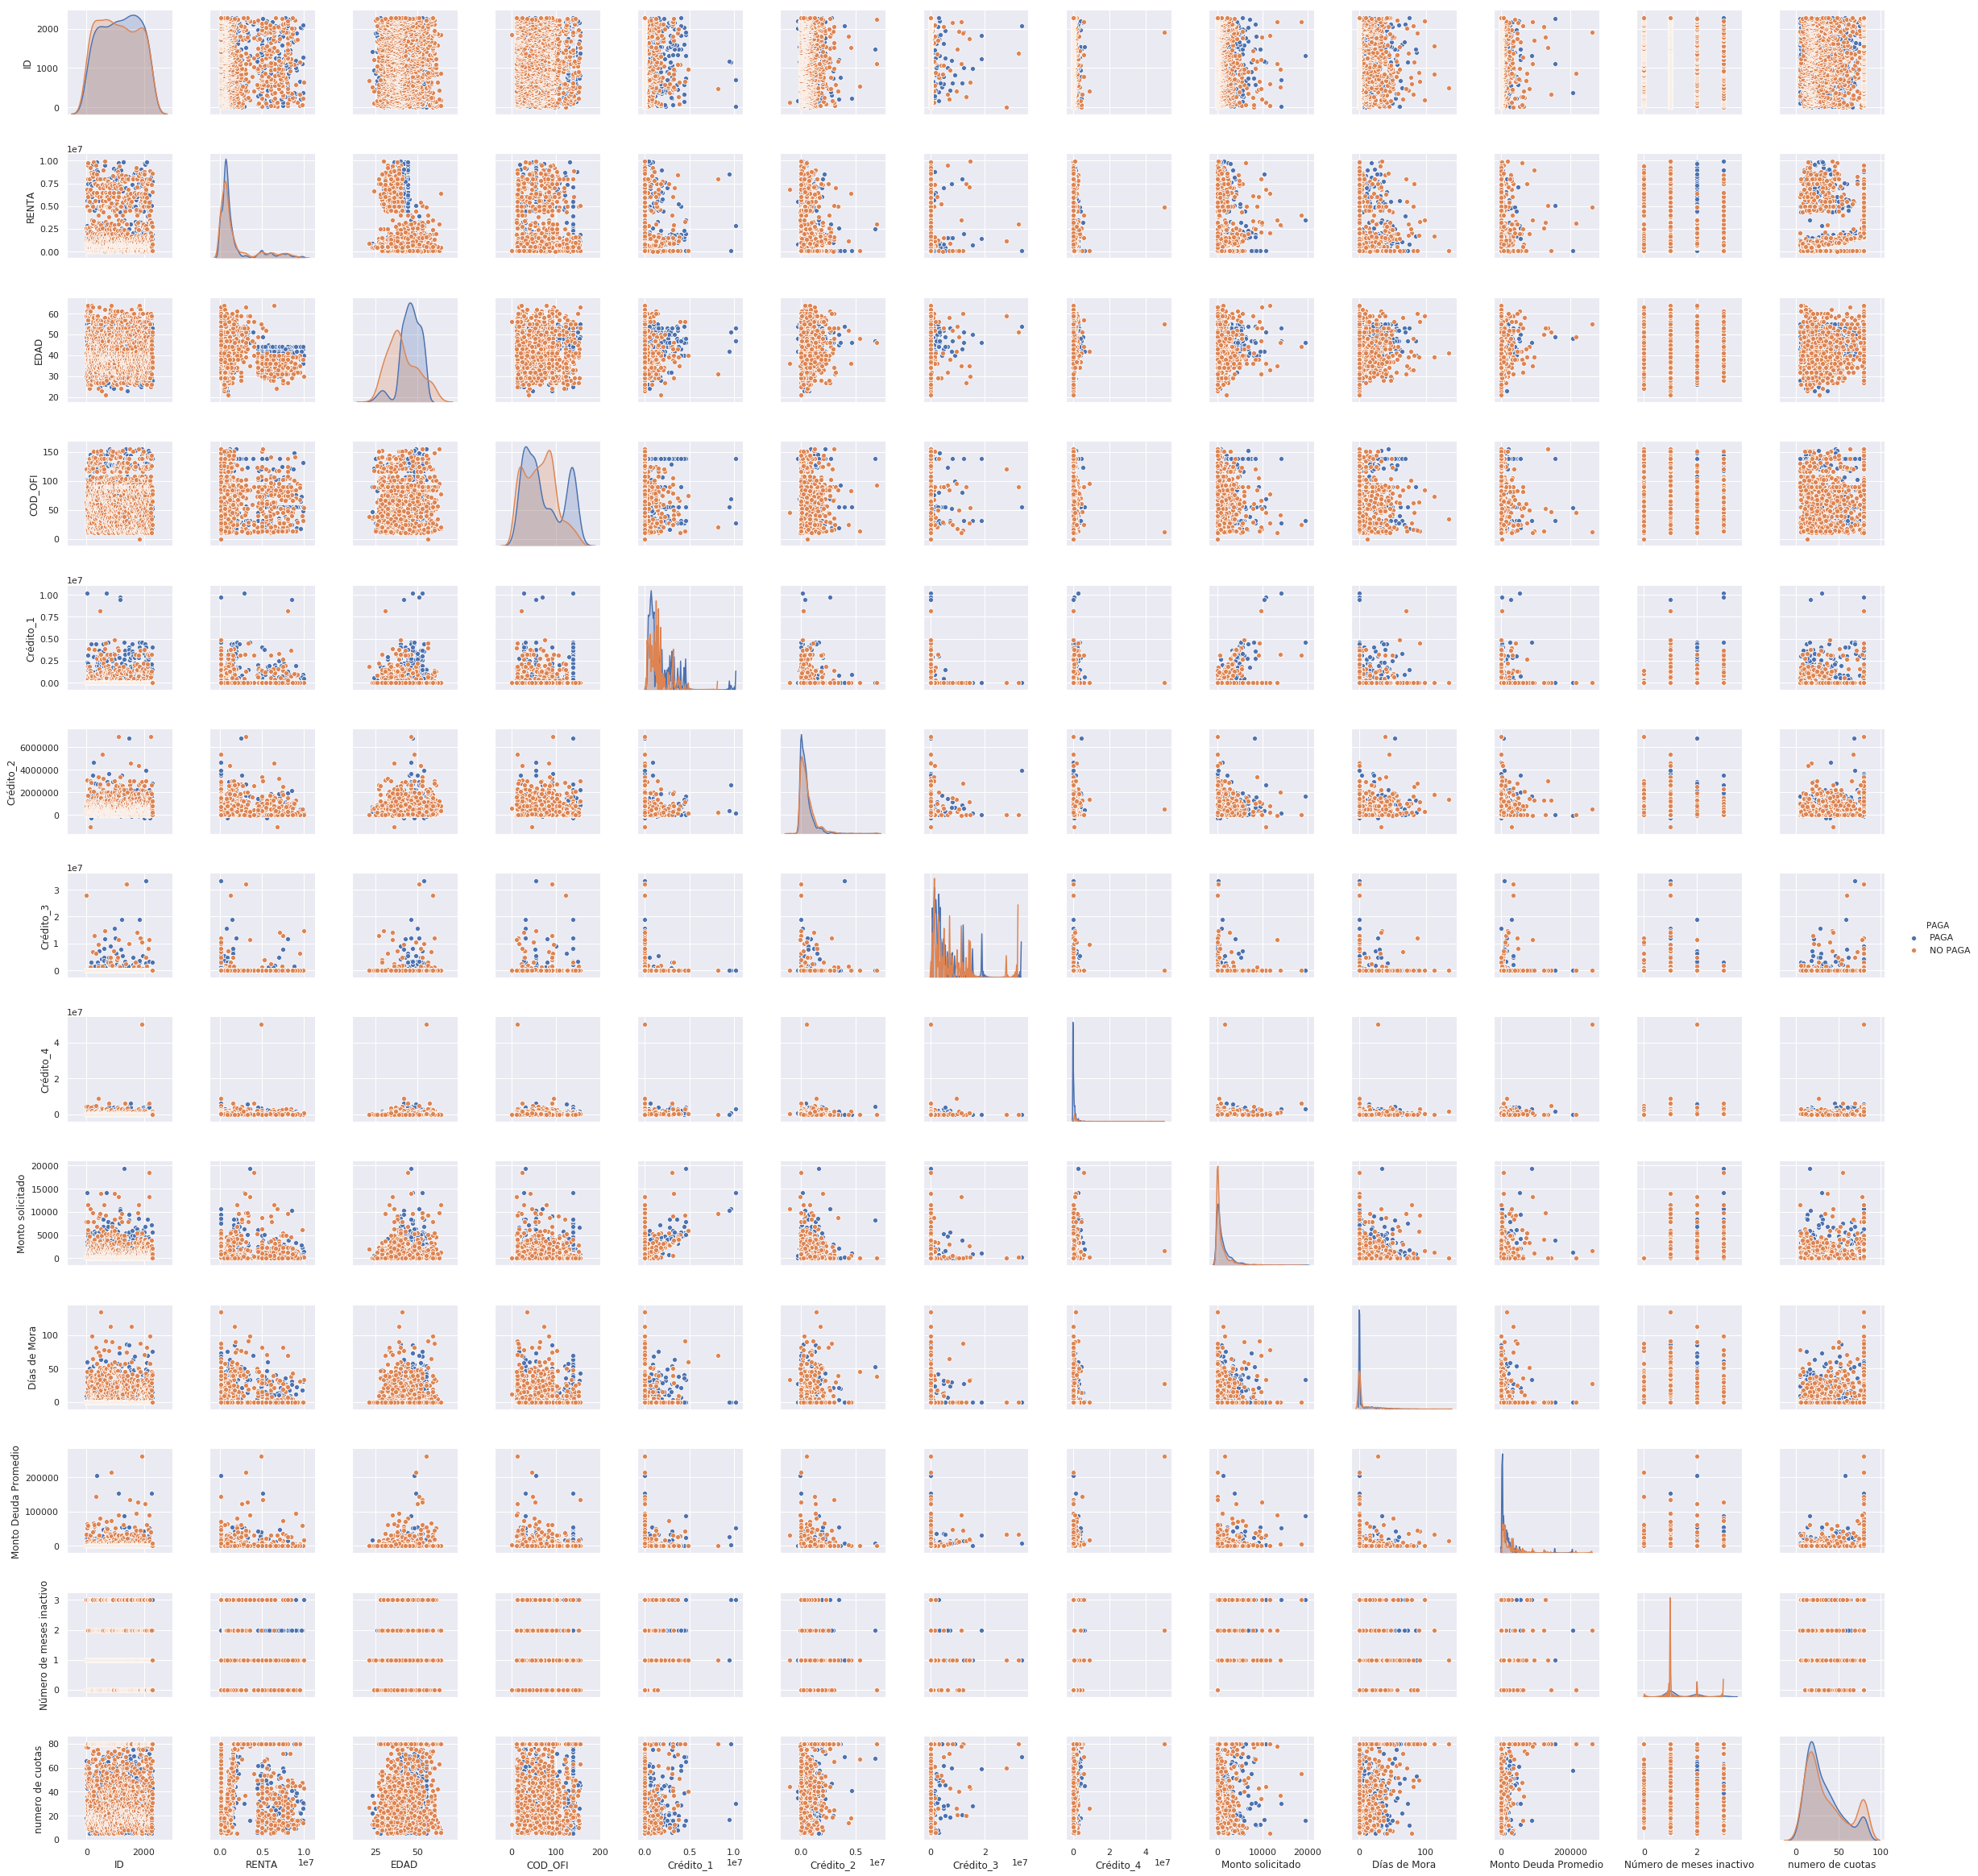

In [9]:
sns.set()
sns.pairplot(data, hue="PAGA")

In [0]:
#Se organizan las etiquetas
renta = data[['PAGA','RENTA']]
renta_1 = renta[renta['PAGA'] == "NO PAGA"]

hombre = data['GENERO'] == "M"
mujer = data['GENERO'] == "F"


casado = data['E_CIVIL'] == "CAS"
viudo = data['E_CIVIL'] == "VIU"
soltero = data['E_CIVIL'] == "SOL"
separado = data['E_CIVIL'] == "SEP"

con_seguro = data['Aval'] == "NO"
sin_seguro = data['Aval'] == "SI"

unv = data['NIV_EDUC'] == "UNV"
tec = data['NIV_EDUC'] == "TEC"
med = data['NIV_EDUC'] == "MED"
eun = data['NIV_EDUC'] == "EUN"
bas = data['NIV_EDUC'] == "BAS"

fuga = data['PAGA'] == "PAGA"
no_fuga = data['PAGA'] == "NO PAGA"

#### 2.1 Visualización Arica

In [0]:
#Se realiza el "análisis aislado" de un caso particular de múltiples fugas

#Se realiza el "link" de arica al código de oficina correspondiente
arica = data['COD_OFI']==138

#Se organizan los datos de Fuga y No Fuga en función de Monto y Renta de
#La persona
arica_fuga = data[arica & fuga  ][['Monto solicitado','RENTA']]
arica_no_fuga = data[arica & no_fuga  ][['Monto solicitado','RENTA']]

#Se crea la tupla de datos, encargada de caracterizarlos
datos = (np.array(arica_fuga), np.array(arica_no_fuga))

#Se le asignan colores como variables visuales principales
colors = ("red", "green")
groups = ("PAGA", "NO PAGA")




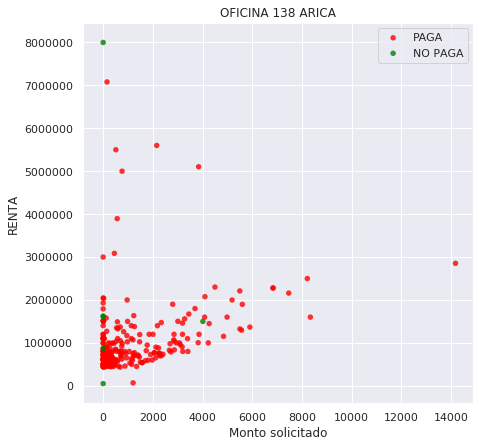

In [12]:
#Se crea la figura de un tamaño específico
fig = plt.figure(figsize=(7,7))
#Se generan los ejes
ax = fig.add_subplot(1, 1, 1)
#Se realiza la iteración para graficar
for datos, color, group in zip(datos, colors, groups):
    x, y = datos[:,0], datos[:,1]
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

#Se realiza el etiquetado de los ejes    
plt.title('OFICINA 138 ARICA')
plt.legend(loc=1)
plt.xlabel('Monto solicitado')
plt.ylabel('RENTA')
#Se muestra el gráfico
plt.show()

#### 2.2 Agrupación por código de oficina

In [0]:
#Se divide el enorme gráfico de plots (Fuga,No Fuga) vs Código de oficina, distribuyendo
#Por código de Oficina
grupo1 = data['COD_OFI']<=31

grupo2_1 = data['COD_OFI']>31
grupo2_2 = data['COD_OFI']<=62

grupo3_1 = data['COD_OFI']>62
grupo3_2 = data['COD_OFI']<=93

grupo4_1 = data['COD_OFI']>93
grupo4_2 = data['COD_OFI']<=124

grupo5_1 = data['COD_OFI']>124
grupo5_2 = data['COD_OFI']<=155



fuga = data['PAGA'] == "PAGA"
no_fuga = data['PAGA'] == "NO PAGA"

#Se realiza intersección de las divisiones para obtener los intervalos
#Deseados
g1 = data[grupo1]
g2 = data[grupo2_1 & grupo2_2]
g3 = data[grupo3_1 & grupo3_2]
g4 = data[grupo4_1 & grupo4_2]
g5 = data[grupo5_1 & grupo5_2]



<Figure size 3200x2400 with 0 Axes>

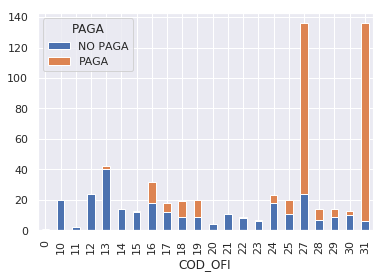

<Figure size 3200x2400 with 0 Axes>

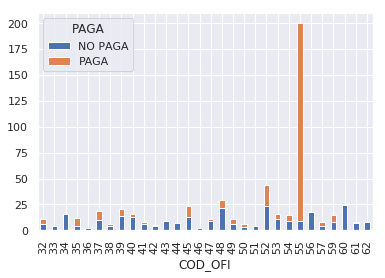

<Figure size 3200x2400 with 0 Axes>

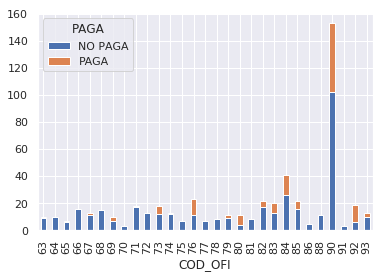

<Figure size 3200x2400 with 0 Axes>

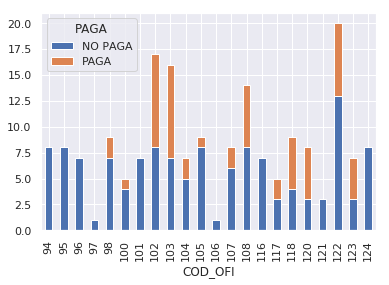

<Figure size 3200x2400 with 0 Axes>

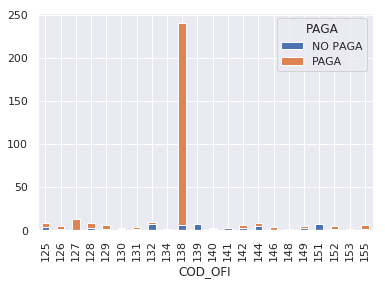

In [14]:
from matplotlib.pyplot import figure

#Se divide el enorme gráfico de plots (Fuga,No Fuga) vs Código de oficina, distribuyendo

#De 0 a 31
df_plot = g1.groupby(['PAGA', 'COD_OFI']).size().reset_index().pivot(columns='PAGA', index='COD_OFI', values=0)
figure(num=None, figsize=(40, 30), dpi=80, facecolor='w', edgecolor='k')
df_plot.plot(kind='bar', stacked=True) 

#De 32 a 62
df_plot = g2.groupby(['PAGA', 'COD_OFI']).size().reset_index().pivot(columns='PAGA', index='COD_OFI', values=0)
figure(num=None, figsize=(40, 30), dpi=80, facecolor='w', edgecolor='k')
df_plot.plot(kind='bar', stacked=True)

#De 63 a 93
df_plot = g3.groupby(['PAGA', 'COD_OFI']).size().reset_index().pivot(columns='PAGA', index='COD_OFI', values=0)
figure(num=None, figsize=(40, 30), dpi=80, facecolor='w', edgecolor='k')
df_plot.plot(kind='bar', stacked=True)

#De 94 a 124
df_plot = g4.groupby(['PAGA', 'COD_OFI']).size().reset_index().pivot(columns='PAGA', index='COD_OFI', values=0)
figure(num=None, figsize=(40, 30), dpi=80, facecolor='w', edgecolor='k')
df_plot.plot(kind='bar', stacked=True)

#De 125 a 155
df_plot = g5.groupby(['PAGA', 'COD_OFI']).size().reset_index().pivot(columns='PAGA', index='COD_OFI', values=0)
figure(num=None, figsize=(40, 30), dpi=80, facecolor='w', edgecolor='k')
df_plot.plot(kind='bar', stacked=True)

#### 2.3 Agrupación por Nivel educacional


Text(0.5, 1.0, 'Grafico de Fuga de Clientes Por Nivel academico')

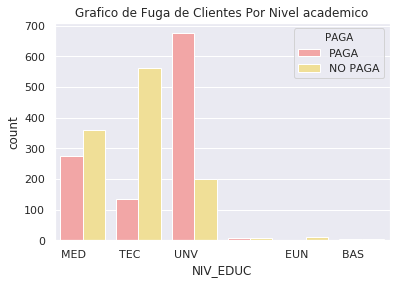

In [15]:
#Se configuran los ejes y datos a utilizar
cp = sns.countplot(x="NIV_EDUC", hue="PAGA", data=data, 
#Junto con la paleta de colores

                   palette={"PAGA": "#FF9999", "NO PAGA": "#FFE888"})
plt.title('Grafico de Fuga de Clientes Por Nivel academico')

#### 2.4 Agrupación por género


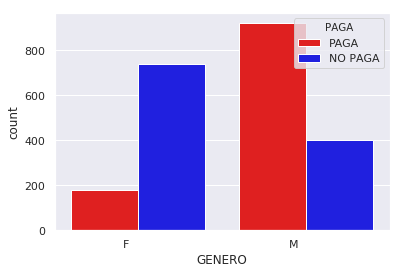

In [16]:
#Se realiza otra representación del mismo fenómeno anterior
#en forma de gráfico de barras.
#Se configuran los ejes y los datos a usar
cp = sns.countplot(x="GENERO", hue="PAGA", data=data, 
#Se configuran los colores
palette={"PAGA": "red", "NO PAGA": "blue"})

#### 2.5 Agrupar por ciudad

Text(0.5, 1.0, 'Grafico de Fuga de Clientes Por Ciudad ')

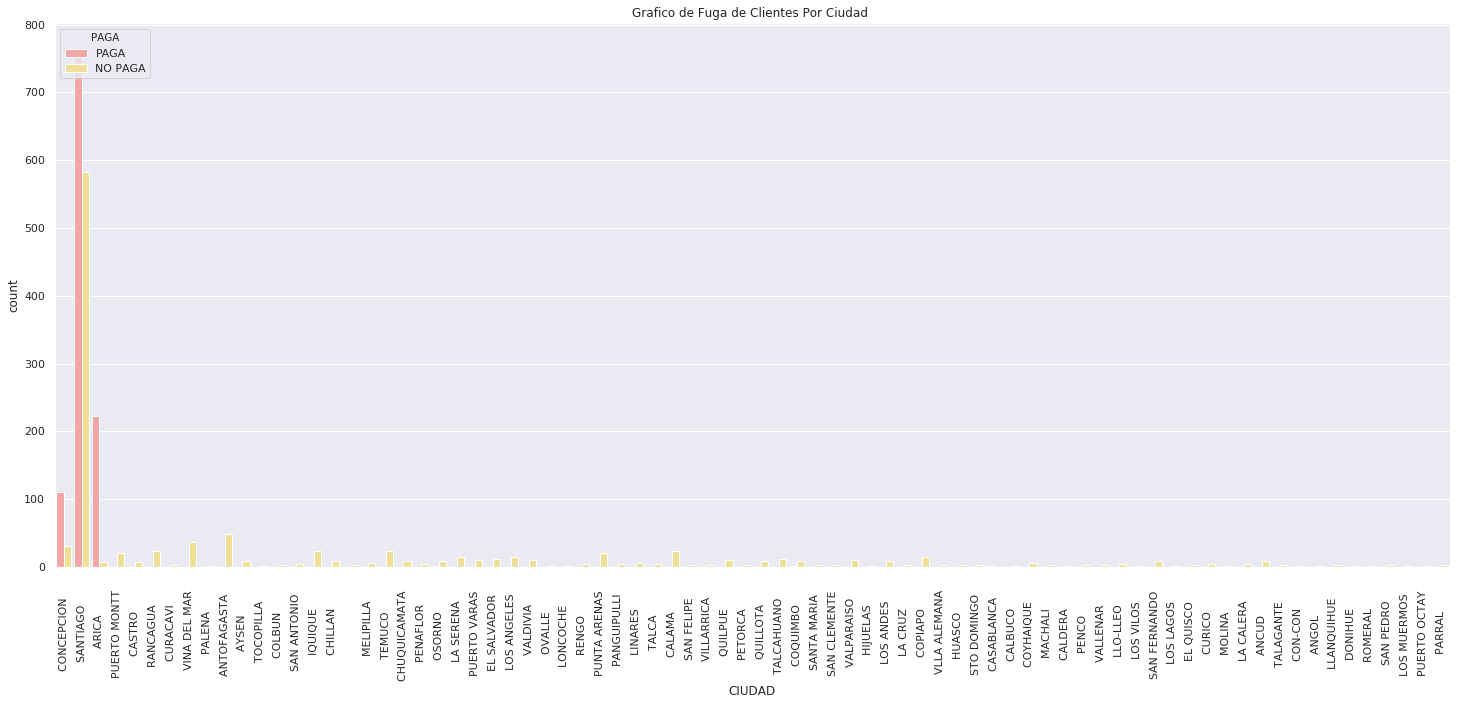

In [17]:
#Se configuran los ejes y datos a utilizar
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(25,10))
cp = sns.countplot(x="CIUDAD", hue="PAGA", data=data, ax = ax,
#Junto con la paleta de colores

                   palette={"PAGA": "#FF9999", "NO PAGA": "#FFE888"})
cp.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Grafico de Fuga de Clientes Por Ciudad ')

#### 2.6 Visualización de datos en CONCEPCION, SANTIAGO Y ARICA.

Se procede a realizar un análisis visual para las ciudades de CONCEPCION, SANTIAGO Y ARICA.

In [0]:
data_santiago = data[data['CIUDAD'] == 'SANTIAGO        ']
data_concepion = data[data['CIUDAD'] == 'CONCEPCION      ']
data_arica = data[data['CIUDAD'] == 'ARICA           ']

In [0]:
def graficos_3ciudades(variable,figsize=(20,6)):
  f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=figsize)
  
  ax1.set_title('Santiago')
  ax1 = sns.countplot(x=variable, hue="PAGA", data=data_santiago, ax=ax1, palette={"PAGA": "#FF9999", "NO PAGA": "#FFE888"})

  ax2.set_title('Concepcion')
  ax2 = sns.countplot(x=variable, hue="PAGA", data=data_concepion, ax=ax2, palette={"PAGA": "#FF9999", "NO PAGA": "#FFE888"})

  ax3.set_title('Arica')
  ax3 = sns.countplot(x=variable, hue="PAGA", data=data_arica, ax=ax3, palette={"PAGA": "#FF9999", "NO PAGA": "#FFE888"})

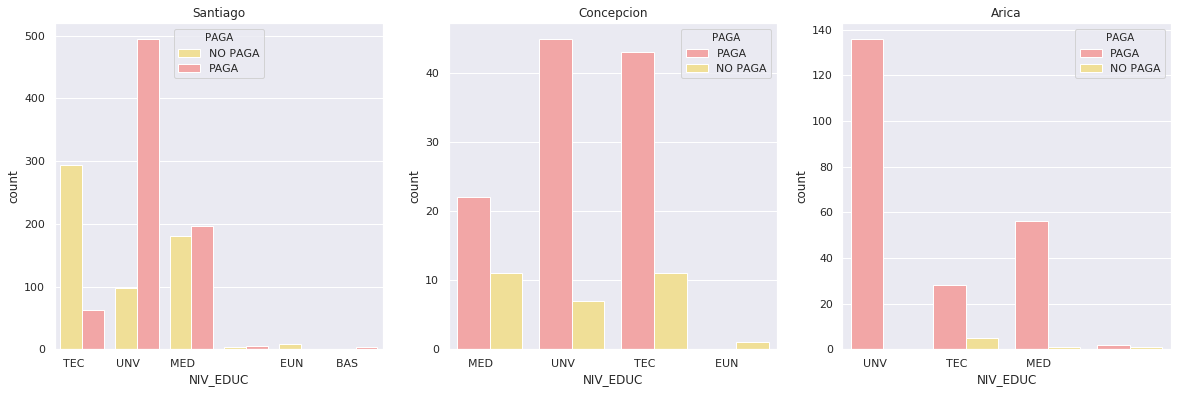

In [82]:
graficos_3ciudades('NIV_EDUC')



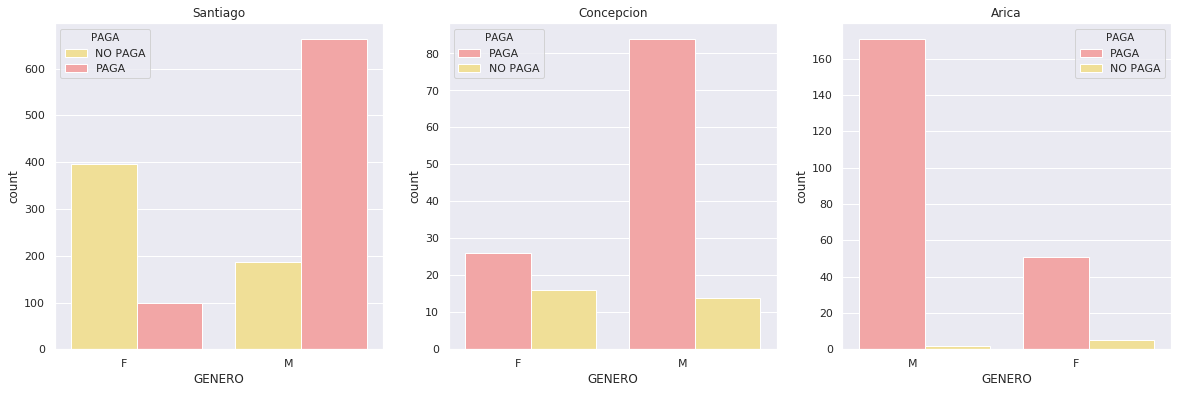

In [83]:
graficos_3ciudades('GENERO')


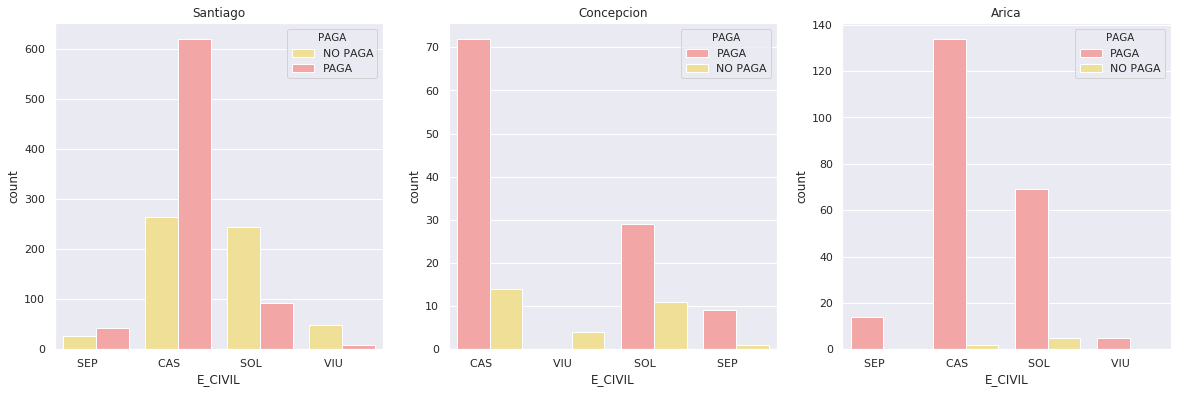

In [84]:
graficos_3ciudades('E_CIVIL')


In [0]:
def distribucion_ciudad(data_ciudad,variable,ax):  
  df = data_ciudad[data_ciudad.PAGA == 'PAGA']
  ax = sns.distplot(df[variable], hist = False, kde = True, label='PAGA', ax=ax)

  df = data_ciudad[data_ciudad.PAGA == 'NO PAGA']
  ax = sns.distplot(df[variable], hist = False, kde = True, label='NO PAGA', ax=ax)

def graficos_3ciudades_dist(variable,figsize=(20,6)):
  f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=figsize)
  
  ax1.set_title('Santiago')
  distribucion_ciudad(data_santiago,variable,ax1)

  ax2.set_title('Concepcion')
  distribucion_ciudad(data_concepion,variable,ax2)

  ax3.set_title('Arica')
  distribucion_ciudad(data_arica,variable,ax3)
  


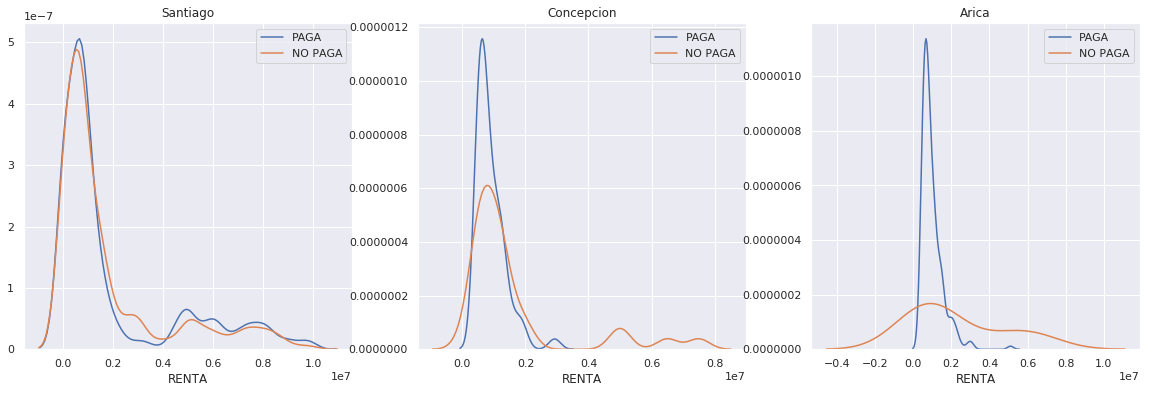

In [98]:
graficos_3ciudades_dist('RENTA')

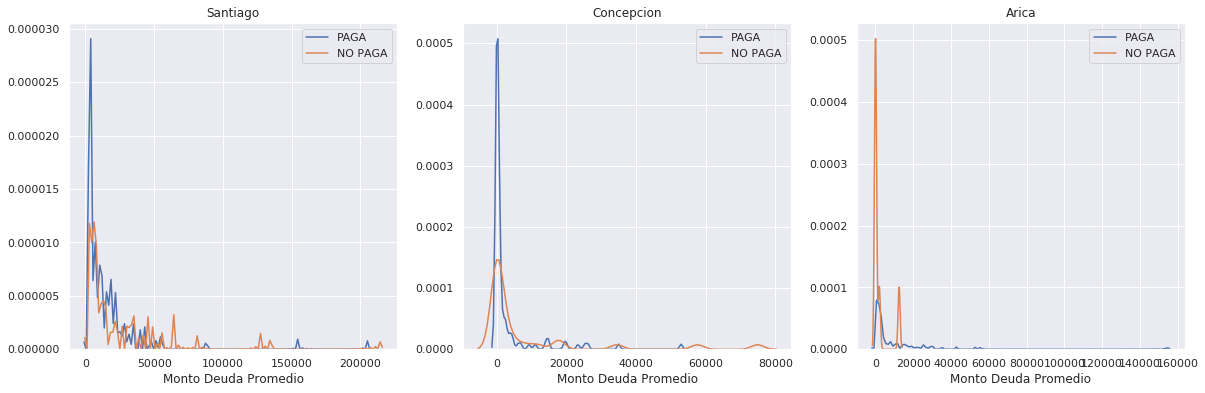

In [99]:
graficos_3ciudades_dist('Monto Deuda Promedio')

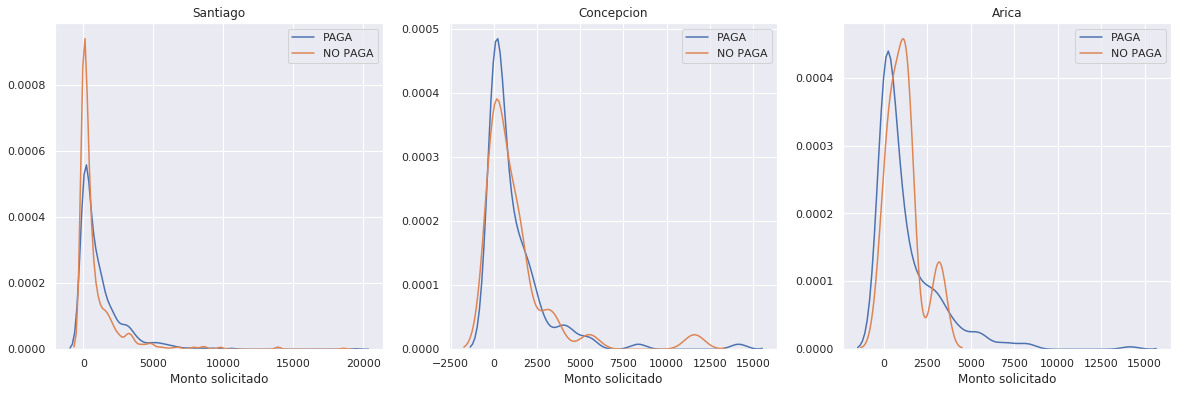

In [100]:
graficos_3ciudades_dist('Monto solicitado')

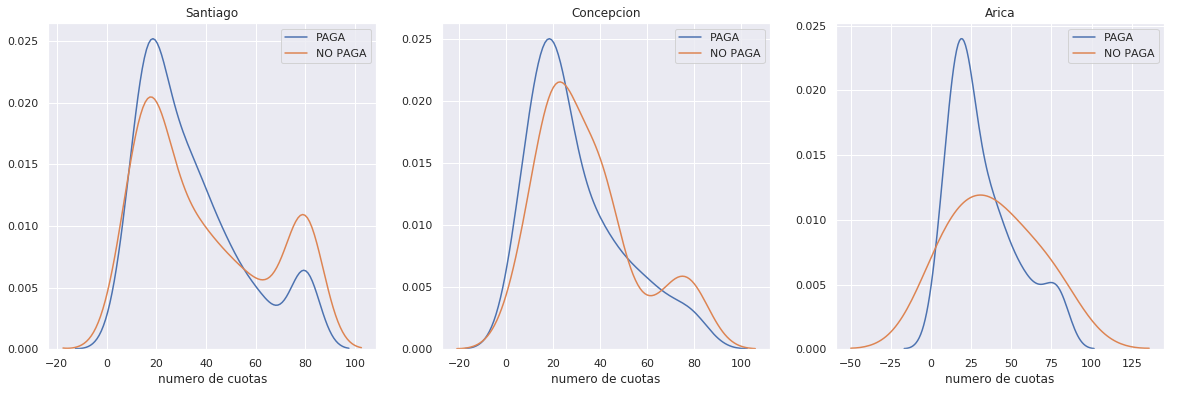

In [101]:
graficos_3ciudades_dist('numero de cuotas')


### 3. Relación entre variables